# Statlog (German Credit Data) Data Set
## https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd

colnames = ["checking account", "Duration", "Credit history", "Purpose", "Credit amount", "Savings account/bonds",
"Present employment since", "Installment rate", "Personal status and sex", "Other debtors / guarantors",
"Present residence since", "Property", "Age in years", "Other installment plans", "Housing",
"Number of existing credits at this bank", "Job", "nro dependents", "Telephone", "foreign worker", "label"]

dataset = pd.read_csv("german.data", names=colnames, header=None, sep=" ", index_col=False)

labels = dataset["label"]

dataset.head()

,checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,nro dependents,Telephone,foreign worker,label
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### Tratamento de valores faltantes
Como é possível observar o dataset não possui dados nulos/faltantes

Em alguns datasets do UCI os dados faltantes são representados por '?', por esse motive foi feita a segunda chegagem

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   checking account                         1000 non-null   object
 1   Duration                                 1000 non-null   int64 
 2   Credit history                           1000 non-null   object
 3   Purpose                                  1000 non-null   object
 4   Credit amount                            1000 non-null   int64 
 5   Savings account/bonds                    1000 non-null   object
 6   Present employment since                 1000 non-null   object
 7   Installment rate                         1000 non-null   int64 
 8   Personal status and sex                  1000 non-null   object
 9   Other debtors / guarantors               1000 non-null   object
 10  Present residence since                  1000 non-null   int6

In [4]:
dataset.eq('?').sum()

checking account                           0
Duration                                   0
Credit history                             0
Purpose                                    0
Credit amount                              0
Savings account/bonds                      0
Present employment since                   0
Installment rate                           0
Personal status and sex                    0
Other debtors / guarantors                 0
Present residence since                    0
Property                                   0
Age in years                               0
Other installment plans                    0
Housing                                    0
Number of existing credits at this bank    0
Job                                        0
nro dependents                             0
Telephone                                  0
foreign worker                             0
label                                      0
dtype: int64

### Attribute 1

In [5]:
dataset[["checking account"]].value_counts()

checking account
A14                 394
A11                 274
A12                 269
A13                  63
dtype: int64

    Attribute 1:  (qualitative)
    Status of existing checking account
    A11 :      ... <    0 DM
    A12 : 0 <= ... <  200 DM
    A13 :      ... >= 200 DM / salary assignments for at least 1 year
    A14 : no checking account

    Olhando apenas os atributos A11, A12, e A13 são categoricos ordinais. Já o atributo A14 não possui ordem.
    Logo não faz sentido tratar o atributo original como ordinal. 

    Vejo 2 saídas:
    1° Quebrar o atributo em 2 atributos da seguinte forma:
        Atributo 1: atributo categorico nominal para dizer se o cliente possui (1) ou não possui conta (0)
        Atributo 2: atributo ordinal para contemplar o DM (0 até 2)

    Exemplo:
    A11 | 1 0
    A12 | 1 1
    A13 | 1 2
    A14 | 0 0

    2° Tratar o atributo como categorico nominal utilizando Dummy
    A11 | 0 0 0 1
    A12 | 0 0 1 0
    A13 | 0 1 0 0
    A14 | 1 0 0 0

### Attribute 2

    Attribute 2:  (numerical)
        Duration in month

    Não precisa fazer nenhum preproc

### Attribute 3

In [6]:
sorted(dataset["Credit history"].unique())

['A30', 'A31', 'A32', 'A33', 'A34']

    Attribute 3:  (qualitative)
    Credit history
        A30 : no credits taken/ all credits paid back duly
        A31 : all credits at this bank paid back duly
        A32 : existing credits paid back duly till now
        A33 : delay in paying off in the past
        A34 : critical account/ other credits existing (not at this bank)

    Caterico nominal - Dummy

### Attribute 4

In [7]:
sorted(dataset["Purpose"].unique())

['A40', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48', 'A49']

    Attribute 4:  (qualitative)
    Purpose
        A40 : car (new)
        A41 : car (used)
        A42 : furniture/equipment
        A43 : radio/television
        A44 : domestic appliances
        A45 : repairs
        A46 : education
        A47 : (vacation - does not exist?)
        A48 : retraining
        A49 : business
        A410 : others

    Caterico nominal - Dummy

### Attribute 5

    Attribute 5:  (numerical)
              Credit amount

    Não precisa fazer nenhum preproc

### Attribute 6

In [8]:
sorted(dataset["Savings account/bonds"].unique())

['A61', 'A62', 'A63', 'A64', 'A65']

    Attibute 6:  (qualitative)
    Savings account/bonds
      A61 :          ... <  100 DM
      A62 :   100 <= ... <  500 DM
      A63 :   500 <= ... < 1000 DM
      A64 :          .. >= 1000 DM
      A65 :   unknown/ no savings account


    Mesma lógica do atributo 1,olhando apenas os atributos A61, A62, A63 e A64 são categoricos ordinais. 
    Já o atributo A65 não possui ordem.
    Logo não faz sentido tratar o atributo original como ordinal. 

    Vejo 2 saídas:
    1° Quebrar o atributo em 2 atributos da seguinte forma:
        Atributo 1: atributo categorico nominal para dizer se o cliente possui (1) ou não possui conta poupança (0)
        Atributo 2: atributo ordinal para contemplar o DM (0 até 3)

    Exemplo:
    A61 | 1 0
    A62 | 1 1
    A63 | 1 2
    A64 | 1 3
    A65 | 0 0

    2° Tratar o atributo como categorico nominal utilizando Dummy
    A61 | 0 0 0 0 1
    A62 | 0 0 0 1 0
    A63 | 0 0 1 0 0
    A64 | 0 1 0 0 0
    A65 | 1 0 0 0 0

### Attribute 7

    Attribute 7:  (qualitative)
    Present employment since
      A71 : unemployed
      A72 :       ... < 1 year
      A73 : 1  <= ... < 4 years  
      A74 : 4  <= ... < 7 years
      A75 :       .. >= 7 years

    Categorico ordinal (poderia utilizar Dummy tbm, mas eu prefiro tratar como ordinal para diminuir o nro de 
    features do modelo e manter a ideia de ordem)
    A71 : 0
    A72 : 1
    A73 : 2  
    A74 : 3
    A75 : 4

### Attribute 8

    Attribute 8:  (numerical)
        Installment rate in percentage of disposable income

    Não precisa fazer nenhum preproc

### Attribute 9

    Attribute 9:  (qualitative)
    Personal status and sex
      A91 : male   : divorced/separated
      A92 : female : divorced/separated/married
      A93 : male   : single
      A94 : male   : married/widowed
      A95 : female : single

    Caterico nominal - Dummy

### Attribute 10

    Attribute 10: (qualitative)
    Other debtors / guarantors
      A101 : none
      A102 : co-applicant
      A103 : guarantor

    Eu trataria como caterico nominal (Dummy) mas acredito q co-applicant é um meio termo entre none e 
    guarantor e não consideraria errado caso o candidato trate como categorico ordinal

### Attribute 11

    Attribute 11: (numerical)
        Present residence since

    Não precisa fazer nenhum preproc

### Attribute 12

    Attribute 12: (qualitative)
    Property
    A121 : real estate
    A122 : if not A121 : building society savings agreement/life insurance
    A123 : if not A121/A122 : car or other, not in attribute 6
    A124 : unknown / no property

    Caterico nominal - Dummy

### Attribute 13

    Attribute 13: (numerical)
        Age in years

    Não precisa fazer nenhum preproc

### Attribute 14

    Attribute 14: (qualitative)
      Other installment plans 
      A141 : bank
      A142 : stores
      A143 : none

    Caterico nominal - Dummy

### Attribute 15

    Attribute 15: (qualitative)
    Housing
        A151 : rent
        A152 : own
        A153 : for free

    Caterico nominal - Dummy

### Attribute 16

    Attribute 16: (numerical)
      Number of existing credits at this bank

    Não precisa fazer nenhum preproc

### Attribute 17

    Attribute 17: (qualitative)
    Job
        A171 : unemployed/ unskilled  - non-resident
        A172 : unskilled - resident
        A173 : skilled employee / official
        A174 : management/ self-employed/highly qualified employee/ officer

    Caterico nominal - Dummy

### Attribute 18

    Attribute 18: (numerical)
        Number of people being liable to provide maintenance for

    Não precisa fazer nenhum preproc

### Attribute 19

    Attribute 19: (qualitative)
    Telephone
        A191 : none
        A192 : yes, registered under the customers name

    Atributo binário que pode ser tratado de 2 formas:
    1° Como uma única feature no sentido de "possua ou não possui a caracteristca"
    Exemplo: 
        A191 | 0
        A192 | 1

    2° Como categorico nominal:
    Exemplo: 
        A191 | 0 1
        A192 | 1 0

### Attribute 20

    Attribute 20: (qualitative)
    foreign worker
      A201 : yes
      A202 : no

    Mesma ideia do atributo anterior

## Análise exploratória de dados do dataset¶

In [9]:
continuous_columns = ["Duration", "Credit amount", "Installment rate", "Present residence since",
                 "Age in years", "Number of existing credits at this bank", 
                 "nro dependents"]
categorical_columns = [f for f in colnames if f not in continuous_columns]

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

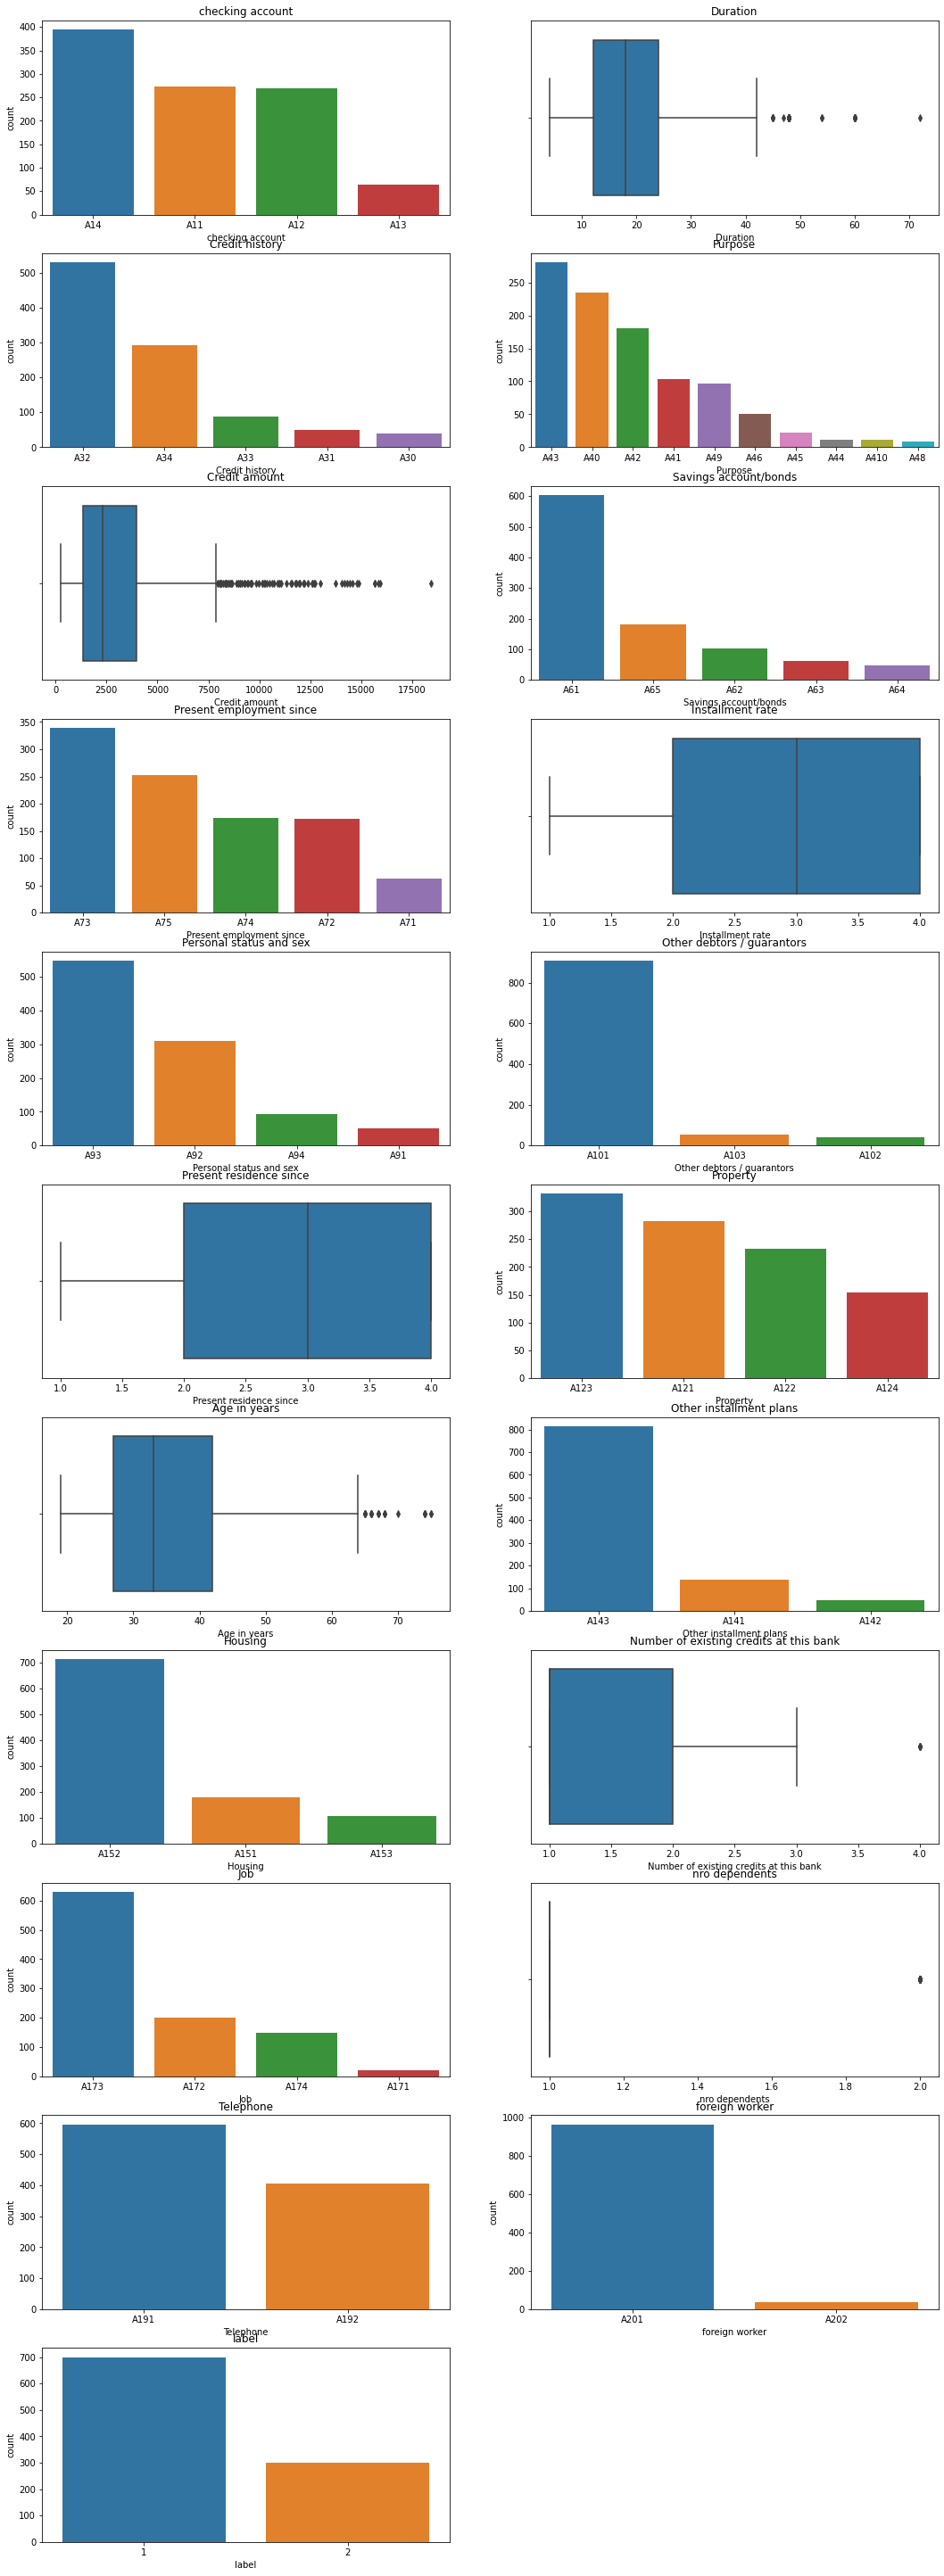

In [11]:
plt.figure().set_size_inches(18, 100)

for i, column in enumerate(colnames):
    plt.subplot(len(colnames), 2, i + 1)
    plt.title(column)
    if column in continuous_columns:
        sns.boxplot(dataset[column])
    else: # Categorico
        sns.countplot(dataset[column], order=dataset[column].value_counts().index)

plt.show()

### Distribuição em relação ao label
(1 = Good, 2 = Bad)

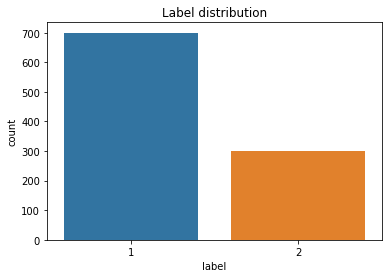

In [12]:
plt.figure().set_size_inches(6, 4)
sns.countplot(labels, order=labels.value_counts().index)
plt.title("Label distribution")
plt.show()

In [13]:
labels.value_counts()

1    700
2    300
Name: label, dtype: int64

## Correlação de variáveis

#### Correlação entre Continuo x Continuo¶

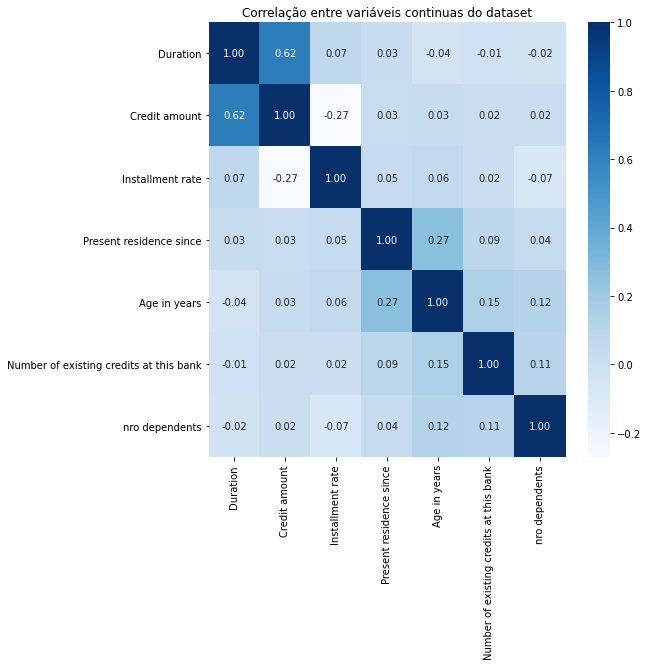

In [14]:
plt.figure().set_size_inches(8, 8)

sns.heatmap(dataset[continuous_columns].corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis continuas do dataset')
plt.show()

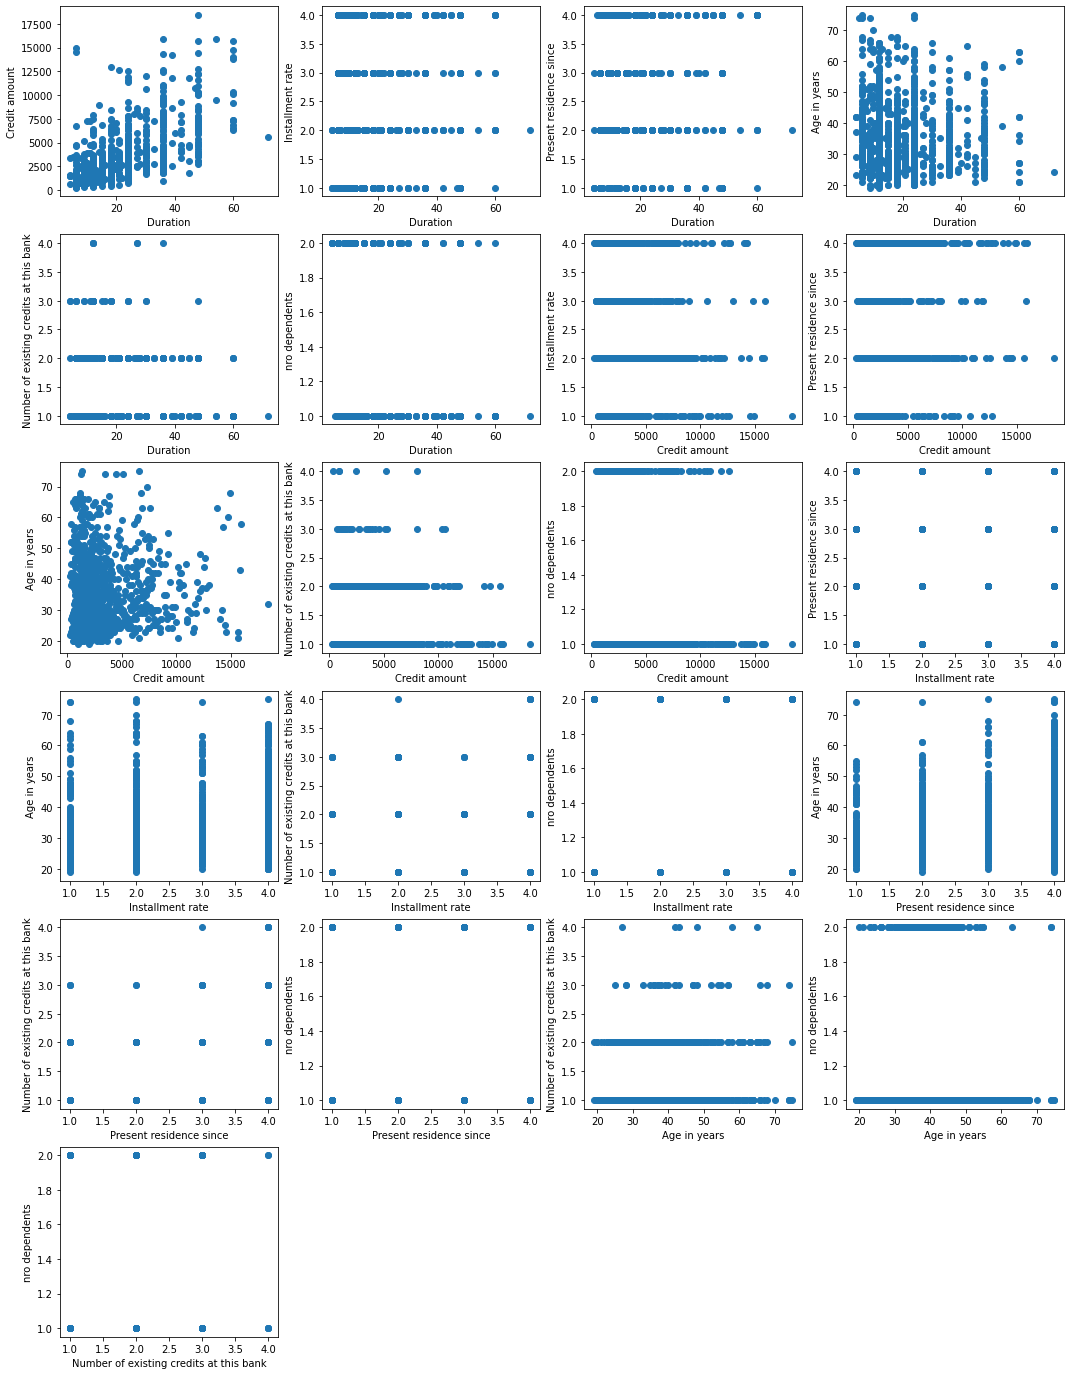

In [15]:
plt.figure().set_size_inches(18, 100)

idx = 0
for i, column_i in enumerate(continuous_columns[0:-1]):
    for j, column_j in enumerate(continuous_columns[i+1:]):
        idx = idx + 1
        plt.subplot(round(len(continuous_columns) * (len(continuous_columns) / 2)), 4, idx)
        plt.xlabel(column_i)
        plt.ylabel(column_j)
        plt.scatter(x=dataset[column_i], y=dataset[column_j])

plt.show()

#### Correlação entre Categorico x Continuo
- ANOVA (Analysis of Variance)
- The greater the F score value the higher the correlation will be.

In [16]:
from scipy import stats
import numpy as np

def correlation_cont_cat(dataset, cont, cat):
    list_of_samples = []
    for val in np.unique(dataset[cat]):
        list_of_samples.append(dataset[dataset[cat]==val][cont])
            
    F, p = stats.f_oneway(*list_of_samples)
    return F

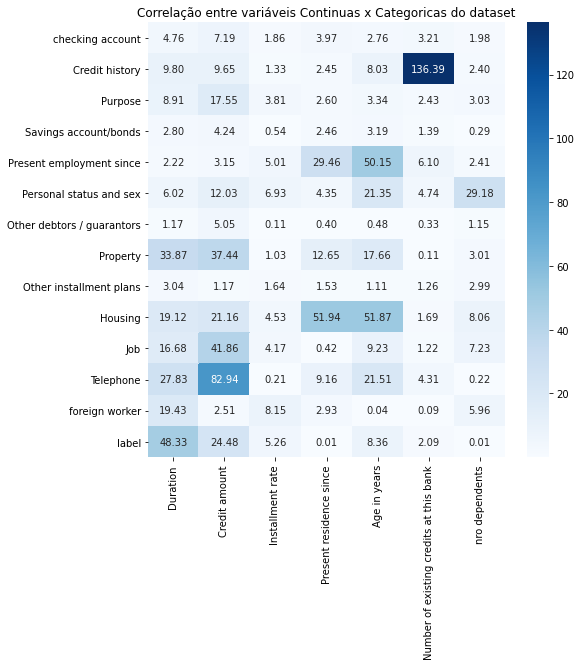

In [17]:
cont_cat_corr = pd.DataFrame(index=categorical_columns, columns=continuous_columns)
for cont in continuous_columns:
    for cat in categorical_columns:
        F = correlation_cont_cat(dataset, cont, cat)
        cont_cat_corr[cont][cat] = F

cont_cat_corr = cont_cat_corr.astype("float64")

plt.figure().set_size_inches(8, 8)

sns.heatmap(cont_cat_corr,
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis Continuas x Categoricas do dataset')
plt.show()

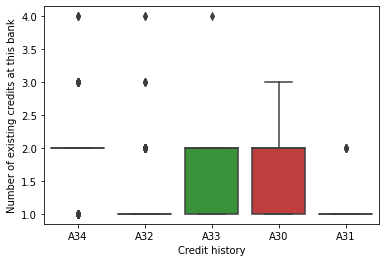

In [18]:
limit = 100

for column in cont_cat_corr.columns:
    idxs = cont_cat_corr[cont_cat_corr[column] > limit].index
    for idx in idxs:
        plt.figure().set_size_inches(6, 4)
        sns.boxplot(x=idx, y=column, data=dataset)
        plt.show()

#### Correlação entre Categorico x Categorico
calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher

In [19]:
from scipy import stats

def cramers_v(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

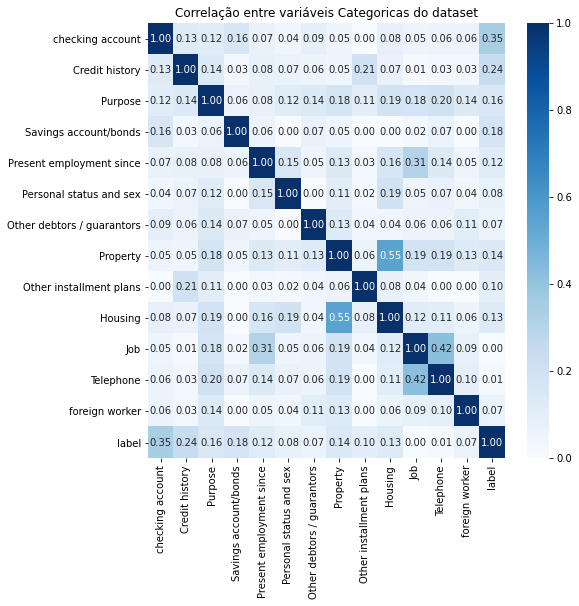

In [20]:
cat_corr = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for i in range(len(categorical_columns)):
    cat_corr[categorical_columns[i]][categorical_columns[i]] = 1.0
    for j in range(i+1, len(categorical_columns)):
        F = cramers_v(dataset[categorical_columns[i]], dataset[categorical_columns[j]])
        cat_corr[categorical_columns[i]][categorical_columns[j]] = F
        cat_corr[categorical_columns[j]][categorical_columns[i]] = F


cat_corr = cat_corr.astype("float64")

plt.figure().set_size_inches(8, 8)
sns.heatmap(cat_corr,
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis Categoricas do dataset')
plt.show()

In [21]:
dataset.groupby(['Purpose','Housing', 'label']).size()

Purpose  Housing  label
A40      A151     1         21
                  2         19
         A152     1        108
                  2         57
         A153     1         16
                  2         13
A41      A151     1         19
                  2          4
         A152     1         51
                  2          3
         A153     1         16
                  2         10
A410     A152     1          4
                  2          4
         A153     1          3
                  2          1
A42      A151     1         29
                  2         19
         A152     1         86
                  2         36
         A153     1          8
                  2          3
A43      A151     1         27
                  2         11
         A152     1        181
                  2         46
         A153     1         10
                  2          5
A44      A151     1          1
                  2          1
         A152     1          7
               

In [22]:
dataset.groupby(['Job','Telephone', 'label']).size()

Job   Telephone  label
A171  A191       1         10
                 2          6
      A192       1          5
                 2          1
A172  A191       1        122
                 2         47
      A192       1         22
                 2          9
A173  A191       1        263
                 2        127
      A192       1        181
                 2         59
A174  A191       1         14
                 2          7
      A192       1         83
                 2         44
dtype: int64

## Engenharia de features para treinamento do modelo

In [23]:
dataset = dataset.drop(columns=["label"])

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Binarios
# foreign worker: A201, A202
# Telephone: A192, A191
labelencoder = LabelEncoder()
dataset["foreign worker"] = labelencoder.fit_transform(dataset["foreign worker"])
dataset["Telephone"] = labelencoder.fit_transform(dataset["Telephone"])

# Multiclass
dataset = pd.get_dummies(dataset, columns=['checking account',
 'Credit history',
 'Purpose',
 'Savings account/bonds',
 'Present employment since',
 'Personal status and sex',
 'Other debtors / guarantors',
 'Property',
 'Other installment plans',
 'Housing',
 'Job'])


# labels: binária (1/2)
labelencoder_class = LabelEncoder()
labels = labelencoder_class.fit_transform(labels.astype(str))

In [25]:
labelencoder_class.classes_

array(['1', '2'], dtype=object)

    classe '1' é representado por 0
    classe '2' é representado por 1

In [26]:
dataset.head()

,Duration,Credit amount,Installment rate,Present residence since,Age in years,Number of existing credits at this bank,nro dependents,Telephone,foreign worker,checking account_A11,...,Other installment plans_A141,Other installment plans_A142,Other installment plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
0,6,1169,4,4,67,2,1,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,0,0,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,0,0,1,...,0,0,1,0,0,1,0,0,1,0


## Detecção de outliers?? 

### Features relevantes
Para analisar os atributos mais relevantes podemos utilizar o algoritmo de DecisionTree baseado no ganho de informação.


Text(0.5, 1.0, 'Importância de cada feature')

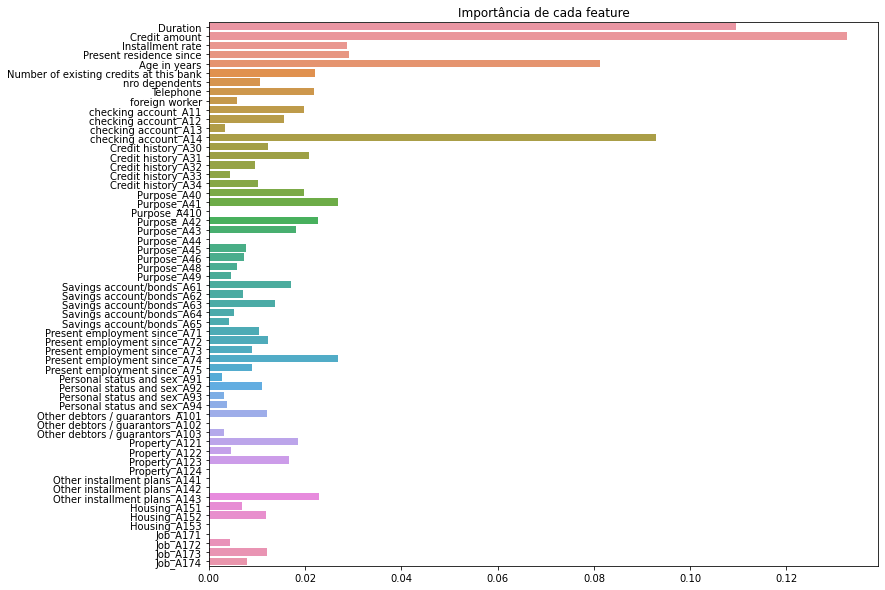

In [27]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_model.fit(dataset, labels)

plt.figure().set_size_inches(12, 10)
importances = pd.Series(data=decision_tree_model.feature_importances_, index=dataset.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

### Normalização/padronização

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
dataset_norm = dataset.copy()
dataset_norm[dataset.columns] = scaler.fit_transform(dataset_norm[dataset.columns])

In [29]:
dataset_norm.head()

,Duration,Credit amount,Installment rate,Present residence since,Age in years,Number of existing credits at this bank,nro dependents,Telephone,foreign worker,checking account_A11,...,Other installment plans_A141,Other installment plans_A142,Other installment plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1.214598,-0.196014,1.627770,...,-0.401796,-0.222076,0.478018,-0.466933,0.634448,-0.347960,-0.149983,-0.5,0.766356,-0.416784
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,-0.823318,-0.196014,-0.614337,...,-0.401796,-0.222076,0.478018,-0.466933,0.634448,-0.347960,-0.149983,-0.5,0.766356,-0.416784
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.823318,-0.196014,-0.614337,...,-0.401796,-0.222076,0.478018,-0.466933,0.634448,-0.347960,-0.149983,2.0,-1.304877,-0.416784
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,-0.823318,-0.196014,1.627770,...,-0.401796,-0.222076,0.478018,-0.466933,-1.576173,2.873893,-0.149983,-0.5,0.766356,-0.416784
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,-0.823318,-0.196014,1.627770,...,-0.401796,-0.222076,0.478018,-0.466933,-1.576173,2.873893,-0.149983,-0.5,0.766356,-0.416784


## Divisão em treinamento e teste
O dataset será dividido em treino/teste. 
A base de treinamento será utilizada para encontrar o melhor modelo através de validação cruzada e estimar seu desempenho. Posteriormente a base de teste (que nunca foi vista pelo modelo) será utilizada para testar o melhor modelo encontrado na fase anterior.

In [30]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(dataset_norm.values, labels, test_size=0.2, random_state=0)

from collections import Counter
print('Amostras treinamento:' ,classe_treinamento.shape[0])
counter = Counter(classe_treinamento)
print(sorted(counter.items()))
print('Amostras teste:' ,classe_teste.shape[0])
counter = Counter(classe_teste)
print(sorted(counter.items()))

Amostras treinamento: 800
[(0, 558), (1, 242)]
Amostras teste: 200
[(0, 142), (1, 58)]


In [31]:
# Calculo dos pesos atribuidos a cada classe no conjunto de treinamento para compensar o 
# desequilibrio da base de dados
from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced', np.unique(classe_treinamento), classe_treinamento)
class_weight_dict = {l: w for l, w in zip(np.unique(classe_treinamento), class_weight)}
print('Peso de cada classe:')
print(class_weight_dict)

Peso de cada classe:
{0: 0.7168458781362007, 1: 1.6528925619834711}


## Treinamento dos modelos utilizando StratifiedKFold
Pontos muito importantes pelo fato do dataset desbalanceado:
- Como esse dataset é desbalanceado é importante utilizar  StratifiedKFold para gerar os folds mantendo a proporção de classes. Para dividir o dataset em treino/val podemos utilizar train_test_split, KFold, StratifiedKFold entre outros..
    - train_test_split vai dividir o dataset em 2 conjuntos de dados 
    - KFold divide o dataset em k folds.
    - Stratified divide o dataset em k folds e garante que cada fold do conjunto de dados tenha a mesma proporção
    de observações de cada label.

- Utilizar uma métrica para datasets desbalanceados. No caso pode ser acurácia balanceada, F1-Score, Recall...

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    confusion_matrix,
    balanced_accuracy_score,
    classification_report,
    recall_score
)

skf = StratifiedKFold(n_splits=3,  # Nro de folds -> Vou fazer só 3 pra ser mais rápido.. hahaha
                     random_state=0,
                      shuffle=True
                     )
skf.get_n_splits(previsores_treinamento, classe_treinamento)

3

In [33]:
def create_df_report(balanced_accuracy, model_name):
    """
    Make a dataframe with the model_name column containing the result of 
    each cross-validation run and the average, min, max and std of the results 
    obtained by the model
    
    Parameters
    ----------
    balanced_accuracy: list
        list containing the balanced accuracy obtained in each exec of the cross-val
    model_name: str
        model name
        
    Returns
    -------
        df: Pandas Dataframe
            dataframe from results of cross-val 
    """
    df = pd.DataFrame(balanced_accuracy, columns=[model_name])
    mean_result = df.mean()
    min_result = df.min()
    max_result = df.max()
    std_result = df.std()
    df.loc["mean"] = mean_result
    df.loc["min"] = min_result
    df.loc["max"] = max_result
    df.loc["std"] = std_result
    
    return df

def run_cross_val_sklearn(model, previsores_treinamento, classe_treinamento, model_name):
    """
    Performs cross-validation for sklearn models and returns the report in dataframe format
    
    Parameters
    ----------
    model: sklearn model
        Model for which the cross-val will be performed
    previsores_treinamento: numpy.array
        Numpy array containing input values to be used to train the model
    classe_treinamento: numpy.array
        Numpy array containing expected output values to be used to train the model
    model_name: str
        model name
        
    Returns
    -------
        df: Pandas Dataframe
            dataframe from results of cross-val
    """
    balanced_accuracy = []
    for fold, (train_index, test_index) in enumerate(skf.split(previsores_treinamento, classe_treinamento)):    
        print(f"====== FOLD {fold+1} ======")
        X_train, X_test = previsores_treinamento[train_index], previsores_treinamento[test_index]
        y_train, y_test = classe_treinamento[train_index], classe_treinamento[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = balanced_accuracy_score(y_test, y_pred)
        balanced_accuracy.append(acc)
        print(f"balanced_accuracy: {acc:.2%}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

    return create_df_report(balanced_accuracy, model_name)

In [34]:
results = []

### Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
results.append(run_cross_val_sklearn(nb_model, previsores_treinamento, classe_treinamento, "Naive Bayes"))

====== FOLD 1 ======
balanced_accuracy: 70.73%
[[146  40]
 [ 30  51]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       186
           1       0.56      0.63      0.59        81

    accuracy                           0.74       267
   macro avg       0.69      0.71      0.70       267
weighted avg       0.75      0.74      0.74       267

====== FOLD 2 ======
balanced_accuracy: 69.92%
[[143  43]
 [ 30  51]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       186
           1       0.54      0.63      0.58        81

    accuracy                           0.73       267
   macro avg       0.68      0.70      0.69       267
weighted avg       0.74      0.73      0.73       267

====== FOLD 3 ======
balanced_accuracy: 56.82%
[[ 37 149]
 [  5  75]]
              precision    recall  f1-score   support

           0       0.88      0.20      0.32       186
           1       0.33    

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion='entropy', class_weight=class_weight_dict, random_state=0)
results.append(run_cross_val_sklearn(decision_tree_model, previsores_treinamento, classe_treinamento, "Decision Tree"))

====== FOLD 1 ======
balanced_accuracy: 61.28%
[[143  43]
 [ 44  37]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       186
           1       0.46      0.46      0.46        81

    accuracy                           0.67       267
   macro avg       0.61      0.61      0.61       267
weighted avg       0.67      0.67      0.67       267

====== FOLD 2 ======
balanced_accuracy: 64.29%
[[145  41]
 [ 40  41]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       186
           1       0.50      0.51      0.50        81

    accuracy                           0.70       267
   macro avg       0.64      0.64      0.64       267
weighted avg       0.70      0.70      0.70       267

====== FOLD 3 ======
balanced_accuracy: 56.29%
[[135  51]
 [ 48  32]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       186
           1       0.39    

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=40, criterion='entropy', class_weight=class_weight_dict, random_state=0)
results.append(run_cross_val_sklearn(random_forest_model, previsores_treinamento, classe_treinamento, "Random Forest"))

====== FOLD 1 ======
balanced_accuracy: 64.94%
[[175  11]
 [ 52  29]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       186
           1       0.72      0.36      0.48        81

    accuracy                           0.76       267
   macro avg       0.75      0.65      0.66       267
weighted avg       0.76      0.76      0.74       267

====== FOLD 2 ======
balanced_accuracy: 65.18%
[[169  17]
 [ 49  32]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       186
           1       0.65      0.40      0.49        81

    accuracy                           0.75       267
   macro avg       0.71      0.65      0.66       267
weighted avg       0.74      0.75      0.73       267

====== FOLD 3 ======
balanced_accuracy: 67.84%
[[171  15]
 [ 45  35]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       186
           1       0.70    

### KNN
Como o KNN olha os vizinhos mais proximos, um dataset desbalanceado irá afetar seu resultado. Esse modelo não suporta atribuição de peso para cada classe, logo deve ser realizado o balanceameno das classes utilizando técnicas de Oversampling, undersampling entre outra..

### LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression
logistic_reg_model = LogisticRegression(class_weight=class_weight_dict, random_state=0)
results.append(run_cross_val_sklearn(logistic_reg_model, previsores_treinamento, classe_treinamento, "LogisticRegression"))

====== FOLD 1 ======
balanced_accuracy: 70.86%
[[135  51]
 [ 25  56]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       186
           1       0.52      0.69      0.60        81

    accuracy                           0.72       267
   macro avg       0.68      0.71      0.69       267
weighted avg       0.75      0.72      0.72       267

====== FOLD 2 ======
balanced_accuracy: 71.56%
[[133  53]
 [ 23  58]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       186
           1       0.52      0.72      0.60        81

    accuracy                           0.72       267
   macro avg       0.69      0.72      0.69       267
weighted avg       0.75      0.72      0.73       267

====== FOLD 3 ======
balanced_accuracy: 70.84%
[[131  55]
 [ 23  57]]
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       186
           1       0.51    

### Máquinas de vetores de suporte (SVM)

In [39]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', class_weight=class_weight_dict, random_state=0)
results.append(run_cross_val_sklearn(svm_model, previsores_treinamento, classe_treinamento, "SVM"))

====== FOLD 1 ======
balanced_accuracy: 70.57%
[[150  36]
 [ 32  49]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       186
           1       0.58      0.60      0.59        81

    accuracy                           0.75       267
   macro avg       0.70      0.71      0.70       267
weighted avg       0.75      0.75      0.75       267

====== FOLD 2 ======
balanced_accuracy: 72.47%
[[141  45]
 [ 25  56]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       186
           1       0.55      0.69      0.62        81

    accuracy                           0.74       267
   macro avg       0.70      0.72      0.71       267
weighted avg       0.76      0.74      0.74       267

====== FOLD 3 ======
balanced_accuracy: 71.47%
[[131  55]
 [ 22  58]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       186
           1       0.51    

### Redes Neurais

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2, L1L2

regularizer = L1L2(l1=0.005, l2=0.005)

def create_mlp_model():
    """
    Create a MLP model using tensorflow.keras.Sequential
    
    Returns
    -------
        mlp: tensorflow.keras.Sequential
            MLP model
    """
    mlp = Sequential()
    mlp.add(Dense(units = 30, activation = 'relu', input_dim=previsores_treinamento.shape[1], kernel_regularizer=regularizer))
    mlp.add(Dropout(0.2))
    mlp.add(Dense(units = 15, activation = 'relu', kernel_regularizer=regularizer))
    mlp.add(Dropout(0.2))
    mlp.add(Dense(units = 1, activation = 'sigmoid'))

    return mlp

def plot_history(history):
    """
    Plot model history
    
    Parameters
    ----------
    
    history: model.history
        Model history
    """
    plt.figure().set_size_inches(20, 5)

    # Accuracy vs Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history['binary_accuracy'],'r')
    plt.plot(history['val_binary_accuracy'],'g')
    plt.xticks(np.arange(0, len(history['binary_accuracy']), 25))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])

    # Loss vs Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'],'r')
    plt.plot(history['val_loss'],'g')
    plt.xticks(np.arange(0, len(history['binary_accuracy']), 25))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
    plt.show()

## MLP sem o class_weight  🧐
Só por curiosidade vou simular a msm MLP sem o class_weight, repare que o o recall da classe majoritária (classe '1' é representado por 0) será muito mais alto do que a da classe minoritária (classe '2' é representado por 1)
O recall é a frequência em que o seu classificador encontra os exemplos de uma classe, ou seja, “quando realmente é da classe X, o quão frequente você classifica como X?”

====== FOLD 1 ======


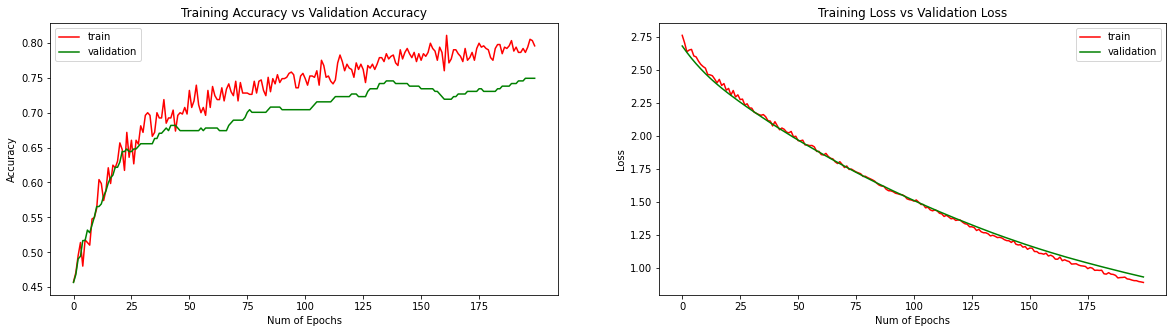

balanced_accuracy: 62.48%
[[175  11]
 [ 56  25]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       186
           1       0.69      0.31      0.43        81

    accuracy                           0.75       267
   macro avg       0.73      0.62      0.63       267
weighted avg       0.74      0.75      0.71       267

====== FOLD 2 ======


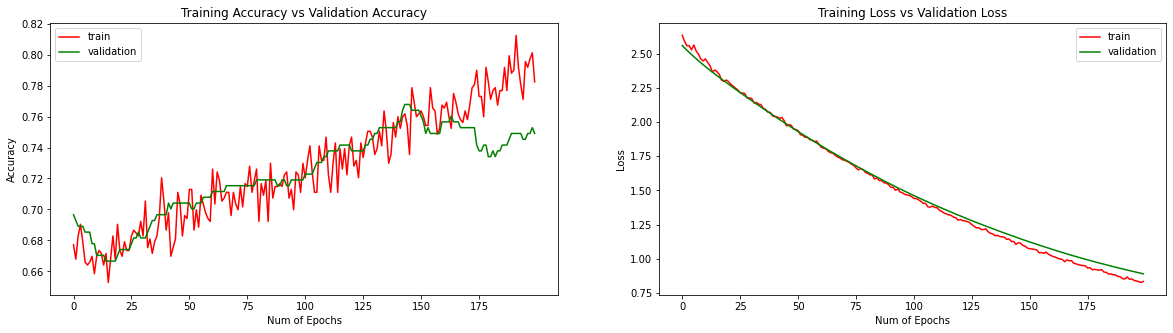

balanced_accuracy: 66.31%
[[164  22]
 [ 45  36]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       186
           1       0.62      0.44      0.52        81

    accuracy                           0.75       267
   macro avg       0.70      0.66      0.67       267
weighted avg       0.73      0.75      0.74       267

====== FOLD 3 ======


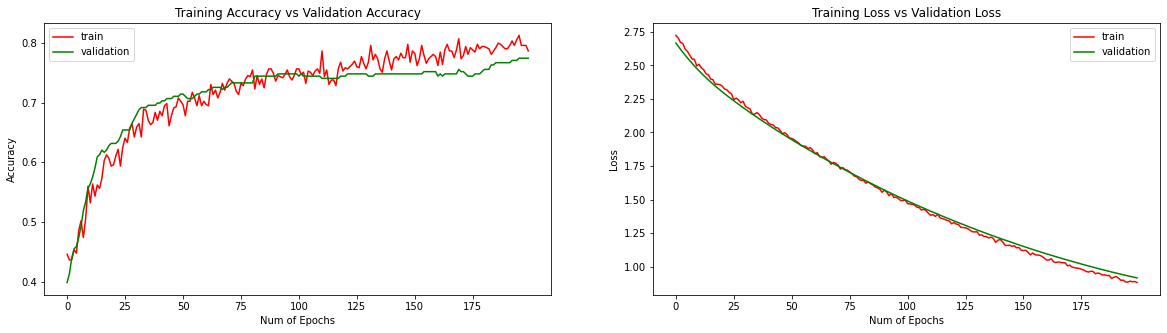

balanced_accuracy: 66.42%
[[175  11]
 [ 49  31]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       186
           1       0.74      0.39      0.51        80

    accuracy                           0.77       266
   macro avg       0.76      0.66      0.68       266
weighted avg       0.77      0.77      0.75       266



In [41]:
balanced_accuracy = []

for fold, (train_index, test_index) in enumerate(skf.split(previsores_treinamento, classe_treinamento)):  
    print(f"====== FOLD {fold+1} ======")
    X_train, X_test = previsores_treinamento[train_index], previsores_treinamento[test_index]
    y_train, y_test = classe_treinamento[train_index], classe_treinamento[test_index]
    
    mlp = create_mlp_model()
    
    ## REPAREM AQUI QUE ESTOU COMPILANDO COM LOSS binary_crossentropy
    mlp.compile(optimizer="adam", loss ='binary_crossentropy',
                metrics = ['binary_accuracy'])
    
    
    history = mlp.fit(X_train, y_train, batch_size=1024, epochs=200, verbose=0, 
#                       class_weight=class_weight_dict,
                      validation_data=(X_test, y_test), 
                     )
    plot_history(history.history)
    y_pred = mlp.predict(X_test)
    y_pred = (y_pred > 0.5) # se > 0.5 -> 1 caso contrário 0
    
    acc = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy.append(acc)
    print(f"balanced_accuracy: {acc:.2%}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
results.append(create_df_report(balanced_accuracy, "MLP sem class_weight"))

## MLP com o class_weight 😁
Reparem que agora o recall irá ficar mais equilibrado, conseguencia do class_weight 

====== FOLD 1 ======
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


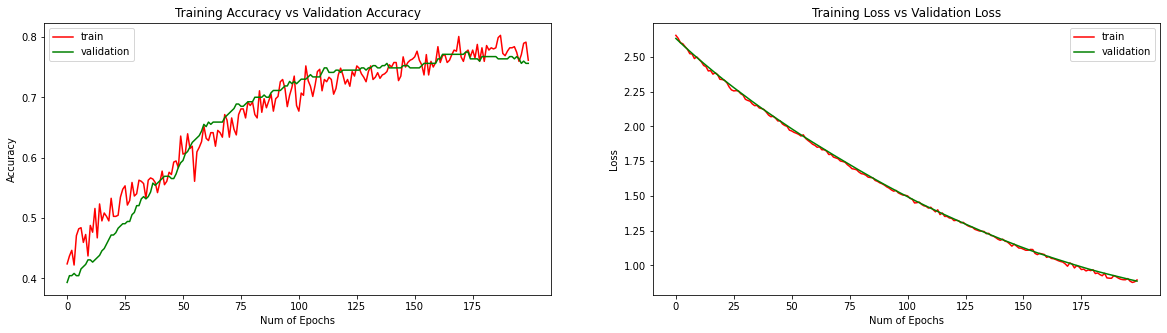

balanced_accuracy: 73.12%
[[148  38]
 [ 27  54]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       186
           1       0.59      0.67      0.62        81

    accuracy                           0.76       267
   macro avg       0.72      0.73      0.72       267
weighted avg       0.77      0.76      0.76       267

====== FOLD 2 ======


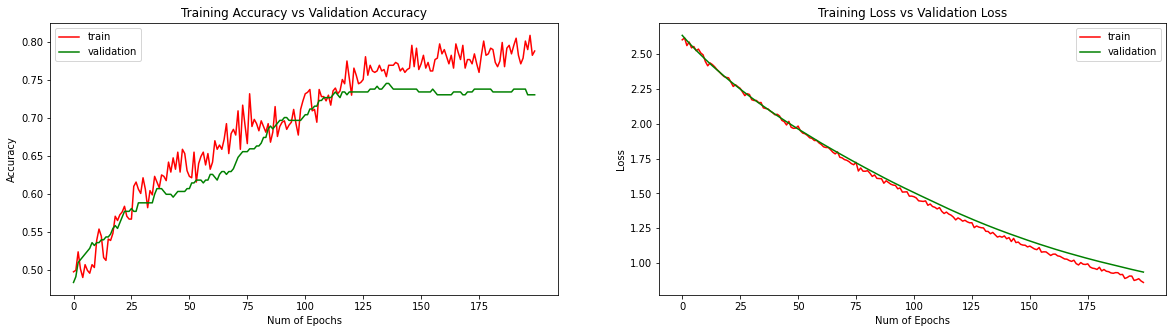

balanced_accuracy: 72.28%
[[138  48]
 [ 24  57]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       186
           1       0.54      0.70      0.61        81

    accuracy                           0.73       267
   macro avg       0.70      0.72      0.70       267
weighted avg       0.76      0.73      0.74       267

====== FOLD 3 ======


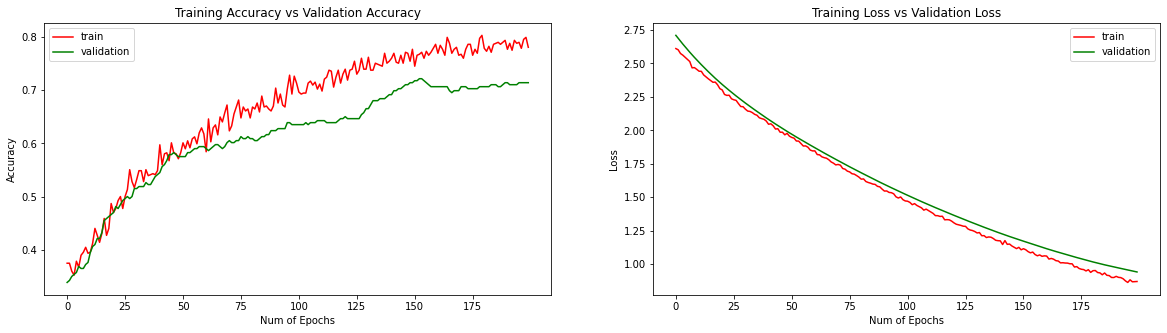

balanced_accuracy: 72.80%
[[129  57]
 [ 19  61]]
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       186
           1       0.52      0.76      0.62        80

    accuracy                           0.71       266
   macro avg       0.69      0.73      0.69       266
weighted avg       0.76      0.71      0.73       266



In [42]:
balanced_accuracy = []

for fold, (train_index, test_index) in enumerate(skf.split(previsores_treinamento, classe_treinamento)):  
    print(f"====== FOLD {fold+1} ======")
    X_train, X_test = previsores_treinamento[train_index], previsores_treinamento[test_index]
    y_train, y_test = classe_treinamento[train_index], classe_treinamento[test_index]
    
    mlp = create_mlp_model()
    
    ## REPAREM AQUI QUE ESTOU COMPILANDO COM LOSS binary_crossentropy
    mlp.compile(optimizer="adam", loss ='binary_crossentropy',
                metrics = ['binary_accuracy'])
    
    
    history = mlp.fit(X_train, y_train, batch_size=1024, epochs=200, verbose=0, 
                      class_weight=class_weight_dict,
                      validation_data=(X_test, y_test), 
                     )
    plot_history(history.history)
    y_pred = mlp.predict(X_test)
    y_pred = (y_pred > 0.5) # se > 0.5 -> 1 caso contrário 0
    
    acc = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy.append(acc)
    print(f"balanced_accuracy: {acc:.2%}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
results.append(create_df_report(balanced_accuracy, "MLP com class_weight"))

## Report results

In [43]:
pd.concat(results, axis=1, sort=False)

,Naive Bayes,Decision Tree,Random Forest,LogisticRegression,SVM,MLP sem class_weight,MLP com class_weight
0,0.707288,0.612804,0.649442,0.708582,0.705695,0.624751,0.731183
1,0.699223,0.642871,0.651832,0.715552,0.724711,0.663082,0.722820
2,0.568212,0.562903,0.678427,0.708401,0.714651,0.664180,0.728024
mean,0.658241,0.606193,0.659901,0.710845,0.715019,0.650671,0.727342
min,0.568212,0.562903,0.649442,0.708401,0.705695,0.624751,0.722820
max,0.707288,0.642871,0.678427,0.715552,0.724711,0.664180,0.731183
std,0.078071,0.040392,0.016089,0.004077,0.009514,0.022454,0.004223


## cost matrix 🤓
A tabela acima ilustra a acurácia balanceada obtida pelos modelos testados em cada um dos folds. Como é possível observar, o modelo de MLP obteve o melhor resultado.

Vou pegar ele de exemplo e tentar implementar a matriz de custo :)

    This dataset requires use of a cost matrix (see below)


          1        2
    ----------------------------
      1   0        1
    -----------------------
      2   5        0

    (1 = Good,  2 = Bad)

    the rows represent the actual classification and the columns
    the predicted classification.

    It is worse to class a customer as good when they are bad (5), 
    than it is to class a customer as bad when they are good (1).

Nosso objetivo aqui é detectar corretamente o máximo possivel de clientes mal pagadores (bad), representados pela classe '2' no dataset e representado por 1 no nosso modelo. Logo não importa muito a Precisão da classe Bad (é menos pior considerar um cliente bom como mau e não conceder o cŕedito) e sim o Recall (quantos clientes maus conseguimos detectar?) para detectar o máximo possivel de clientes

#### Os pesos aqui eu tirei da minha cabeça, não fiquei testanto muitos parametros.. oq importa é a lógica! 😉

In [44]:
import tensorflow.keras.backend as K
import tensorflow as tf

cost_FP = 1 # Prever que o cliente é mau mas ele é bom - "menos pior caso", logo penalidade baixa
cost_FN = 5 # Prever que o cliente é bom mas ele é mau - pior caso, logo maior penalidade
cost_TP = 0 # Prever que o cliente é bom quando ele realmente é bom - acertou, custo 0
cost_TN = 0 # Prever que o cliente é mau quando ele realmente é mau - acertou, custo 0

def custom_loss(c_FP, c_TP, c_TN, c_FN):
    
    def loss_function(y_input, y_pred):
        y_true = K.round(y_input)
        eps = 0.0001
        y_pred = K.minimum(1.0 - eps, K.maximum(0.0 + eps, y_pred))
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)

        cost = y_true * (K.log(y_pred) * c_FN + K.log(1 - y_pred) * c_TP)
        cost += (1 - y_true) * (K.log(1 - y_pred) * c_FP + K.log(y_pred) * c_TN)
        return - K.mean(cost, axis=-1)
    return loss_function

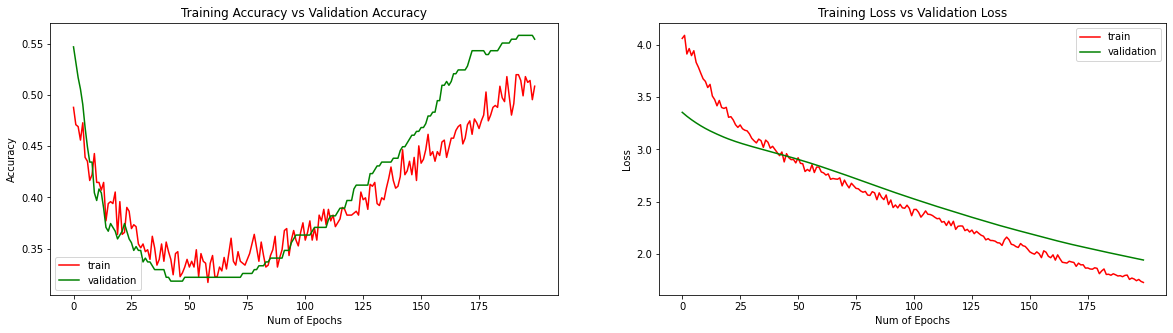

balanced_accuracy: 66.97%
              precision    recall  f1-score   support

           0       0.96      0.38      0.54       186
           1       0.40      0.96      0.57        81

    accuracy                           0.55       267
   macro avg       0.68      0.67      0.55       267
weighted avg       0.79      0.55      0.55       267

0.7280241935483871
[0.37634409 0.96296296]


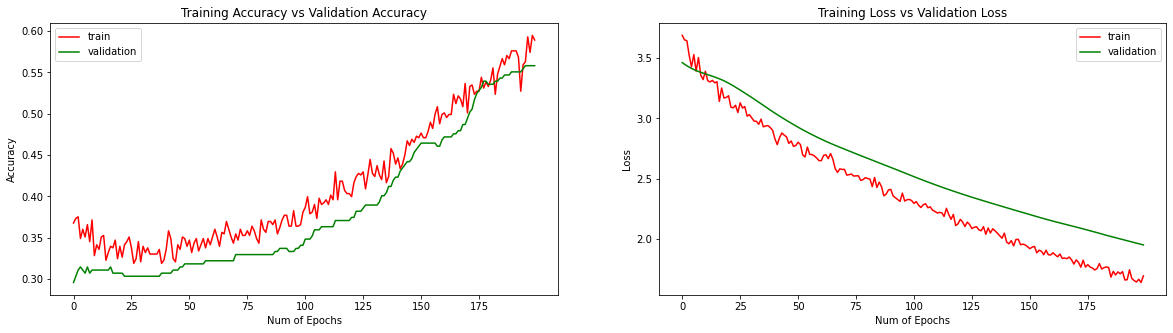

balanced_accuracy: 66.19%
              precision    recall  f1-score   support

           0       0.93      0.40      0.56       186
           1       0.40      0.93      0.56        81

    accuracy                           0.56       267
   macro avg       0.66      0.66      0.56       267
weighted avg       0.77      0.56      0.56       267

0.7280241935483871
[0.39784946 0.92592593]


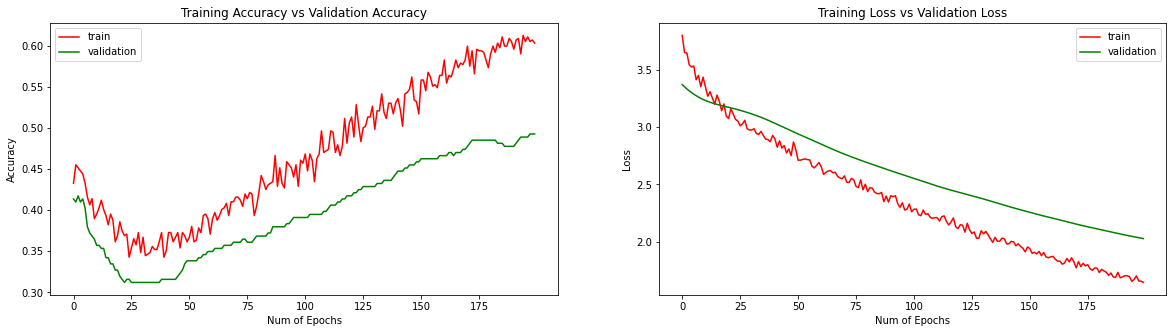

balanced_accuracy: 62.28%
              precision    recall  f1-score   support

           0       0.93      0.30      0.45       186
           1       0.37      0.95      0.53        80

    accuracy                           0.49       266
   macro avg       0.65      0.62      0.49       266
weighted avg       0.76      0.49      0.47       266

0.7280241935483871
[0.29569892 0.95      ]


In [45]:
for train_index, test_index in skf.split(previsores_treinamento, classe_treinamento):    
    X_train, X_test = previsores_treinamento[train_index], previsores_treinamento[test_index]
    y_train, y_test = classe_treinamento[train_index], classe_treinamento[test_index]
    
    mlp = create_mlp_model()
    
    ## REPAREM QUE AGORA ESTOU COMPILANDO COM MINHA LINDA custom_loss
    mlp.compile(optimizer="adam", loss =custom_loss(cost_FP, cost_TP, cost_TN, cost_FN),
                metrics = ['binary_accuracy'])
    
    history = mlp.fit(X_train, y_train, batch_size=1024, epochs=200, verbose=0, 
                      class_weight=class_weight_dict,
                      validation_data=(X_test, y_test), 
                     )
    plot_history(history.history)
    y_pred = mlp.predict(X_test)
    y_pred = (y_pred > 0.5) # se > 0.5 -> 1 caso contrário 0

    print(f"balanced_accuracy: {balanced_accuracy_score(y_test, y_pred):.2%}")
    print(classification_report(y_test, y_pred))
    print(acc)
    print(recall_score(y_test, y_pred, average=None))
    

# E ta lá!!! Recall >94% 😎😎😎🚀

## Treinamento do modelo final
Vou adotar aqui q nosso objetivo principal é encontrar o modelo com o maior recall possível para a classe mau (representado pelo 1), blz?

### Classificador único
Como o modelo de MLP com custom loss obteve a maior recall para a classe 1 no cross-validation, ele será o modelo utilizado na predição.

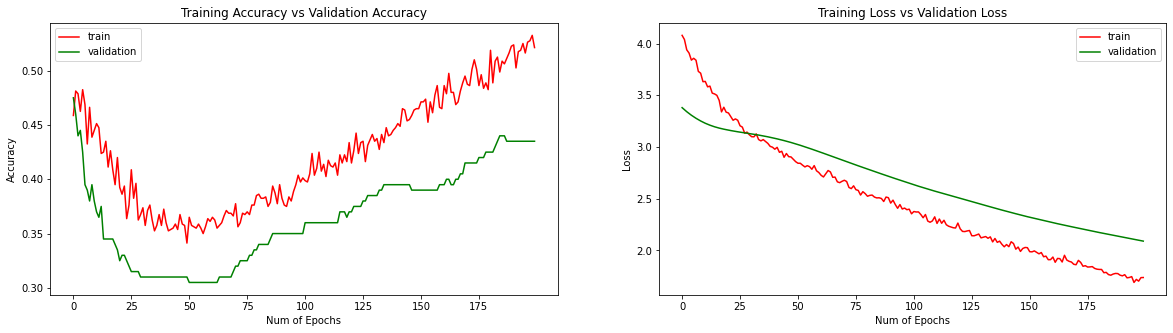

balanced_accuracy: 58.17%
              precision    recall  f1-score   support

           0       0.89      0.23      0.37       142
           1       0.33      0.93      0.49        58

    accuracy                           0.43       200
   macro avg       0.61      0.58      0.43       200
weighted avg       0.73      0.43      0.40       200

[[ 33 109]
 [  4  54]]


In [46]:
mlp = create_mlp_model()
mlp.compile(optimizer="adam", loss =custom_loss(cost_FP, cost_TP, cost_TN, cost_FN),
            metrics = ['binary_accuracy'])

model_history = mlp.fit(previsores_treinamento, classe_treinamento, batch_size=1024, epochs=200, verbose=0,
                  class_weight=class_weight_dict, validation_data=(previsores_teste, classe_teste))

   
plot_history(model_history.history)

y_pred = mlp.predict(previsores_teste)
y_pred = (y_pred > 0.5) # se > 0.5 -> 1 caso contrário 0

print(f"balanced_accuracy: {balanced_accuracy_score(classe_teste, y_pred):.2%}")
print(classification_report(classe_teste, y_pred))
print(confusion_matrix(classe_teste, y_pred))

### Conseguimo sum Recall de 93% 😎

Como o recall de todos os outros classificadores foram ruins para a classe 1 (Bad) e o recall da MLP já está bem alto, tentar utilizar um ensemble não ajudará a melhorar o recall.

Se o objetivo for tentar melhorar a precisão, faz sentido tentar utilizar um ensemble aqui sim.. ai seria o msm esquema do outro notebook! 😉

### Beijos do Rafa e qualquer coisa me mandem um Zap

Se eu sonhar com um alguma gambiarra eu volto aqui... haha